In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [2]:
#import the dataset.
dataset = pd.read_csv('winequalityN.csv', 
                      sep=',', na_values=["?"])

In [3]:
#print the first 5 rows to get an idea of the dataset.
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#information about the attributes and the variables of the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


C:\Users\vange\AppData\Local\Temp\ipykernel_20832\3862913102.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


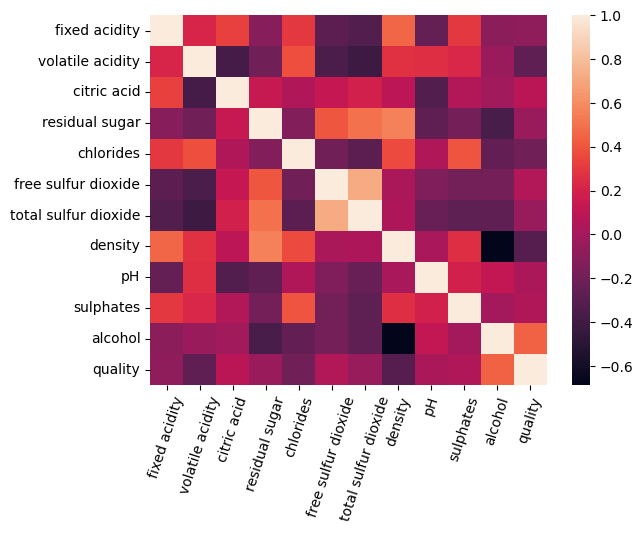

In [6]:
corr = dataset.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
ax.set_xticklabels(ax.get_xticklabels(), rotation=72)
plt.show()

<Axes: xlabel='quality', ylabel='Density'>

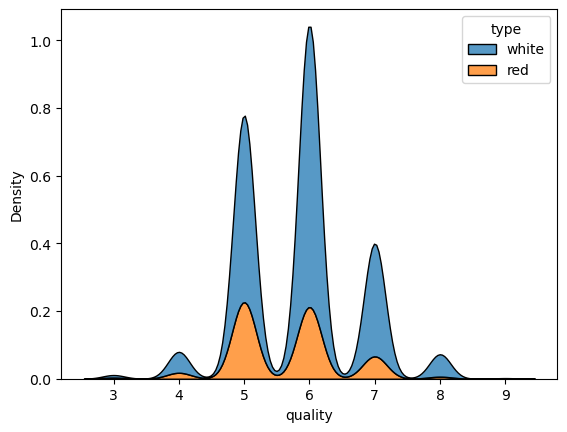

In [7]:
sns.kdeplot(data=dataset, x='quality', hue='type', multiple='stack',palette='tab10')


Text(0, 0.5, 'Count')

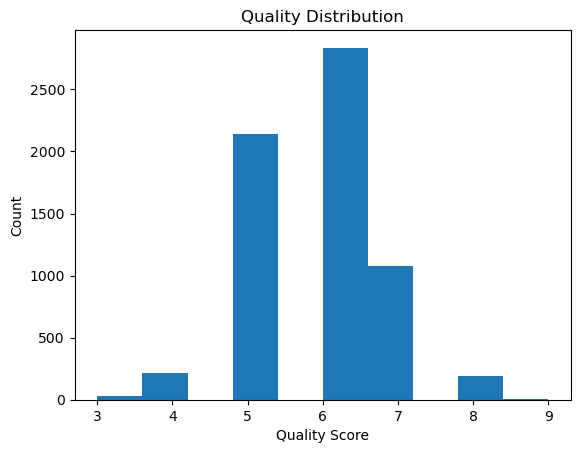

In [8]:
plt.hist(dataset['quality'])
plt.title('Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Count')

In [9]:
names =['type','free sulfur dioxide', 'total sulfur dioxide', 'pH']
for i in names:
    dataset=dataset.drop(columns=[i])
dataset.info()

             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     6487 non-null   float64
 1   volatile acidity  6489 non-null   float64
 2   citric acid       6494 non-null   float64
 3   residual sugar    6495 non-null   float64
 4   chlorides         6495 non-null   float64
 5   density           6497 non-null   float64
 6   sulphates         6493 non-null   float64
 7   alcohol           6497 non-null   float64
 8   quality           6497 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 456.9 KB


In [10]:
#checking for missing values. we view all the rows that contain the missing values to determine their impact on the dataset.
missing_rows = dataset.isnull().any(axis=1).sum()
print(missing_rows)
dataset[pd.isnull(dataset).any(axis=1)]

27


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,sulphates,alcohol,quality
17,NaN,0.660,0.48,1.2,0.029,0.98920,0.39,12.8,8
33,6.2,0.120,0.34,NaN,0.045,0.99390,0.51,9.0,6
86,7.2,NaN,0.63,11.0,0.044,0.99740,0.44,8.7,6
98,9.8,0.360,0.46,10.5,NaN,0.99560,0.30,10.1,4
174,NaN,0.270,0.31,17.7,0.051,0.99900,0.64,10.2,5
224,6.3,0.495,0.22,1.8,0.046,0.99290,NaN,10.4,6
249,NaN,0.410,0.14,10.4,0.037,0.99600,0.45,10.0,5
267,NaN,0.580,0.07,6.9,0.043,0.99440,0.57,9.7,5
268,5.3,0.585,NaN,7.1,0.044,0.99450,0.57,9.7,6
368,NaN,0.290,0.48,2.3,0.049,0.99310,0.64,10.6,6


In [11]:
#since there only a few rows i decided to drop the rows as they won't have an impact on the model. 
dataset= dataset.dropna()
dataset[pd.isnull(dataset).any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,sulphates,alcohol,quality


In [12]:
#checking for duplicate rows
dups = dataset.duplicated()
dups.sum()

1179

In [13]:
#dropping the duplicate rows and checking the amount of rows after the drop
print( (dataset.shape[0]))
dataset = dataset.drop_duplicates()
print((dataset.shape[0]))

6470
5291


In [14]:
#convert the quality column into values of 0, 1, 2, or 3 depending on their quality score
bins = [0, 5, 6, 7, 10]
label = [0, 1, 2, 3]
dataset['quality'] = pd.cut(dataset['quality'], bins=bins, labels=label)

Text(0, 0.5, 'Count')

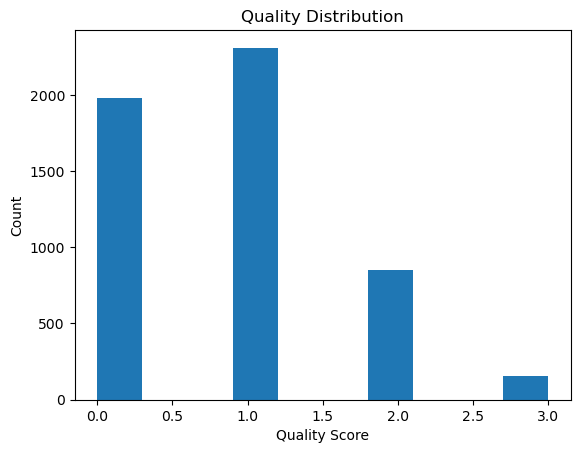

In [15]:
plt.hist(dataset['quality'])
plt.title('Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Count')

In [16]:
#checking the instances of each category of quality
quality_column =dataset['quality'].value_counts()
quality_column

1    2309
0    1978
2     851
3     153
Name: quality, dtype: int64

In [17]:
# Separating features and target.
X = dataset.drop('quality', axis=1)
y = dataset['quality']

# Setting SMOTE and transforming the data.
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


# Checking for the balance of the classes again.
print(y_smote.value_counts())
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
# Setting the experiment with different Classifiers.
#classifiers = {
#    'Random Forest': RandomForestClassifier(random_state=42),
#    'Support Vector Machine': SVC(random_state=42),
#    'K-Nearest Neighbors': KNeighborsClassifier(),
#    'Decision Tree': DecisionTreeClassifier(random_state=42)
#}
#for clf_name, clf in classifiers.items():
#    clf.fit(X_train, y_train)
#    y_pred = clf.predict(X_test)
#    print(f"{clf_name}:")
#    print("Accuracy Score:", accuracy_score(y_test, y_pred))
#    print("Classification Report:\n", classification_report(y_test, y_pred))
#rf = RandomForestClassifier(n_estimators=100, random_state=42)
#Moving forward with Random Forest
# Fit the oversampled and balanced training data
#rf.fit(X_train, y_train) 

# Prediction on test set
#y_pred = rf.predict(X_test)
# Printing evaluation metrics.
#print(classification_report(y_test, y_pred))
#print("Random forest accuracy is:", rf.score(X_test, y_test))
#print(confusion_matrix(y_test, y_pred))

0    2309
1    2309
2    2309
3    2309
Name: quality, dtype: int64


In [18]:
rf = RandomForestClassifier(n_estimators= 200,max_depth=30,min_samples_split=1,min_samples_leaf=1,max_features='auto',random_state=42)
rf.fit(X_train, y_train) 

# Prediction on test set
y_pred = rf.predict(X_test)
# Printing evaluation metrics.
print(classification_report(y_test, y_pred))
print("Random forest accuracy is:", rf.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))

C:\Users\vange\AnacondaNew\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.68      0.74      0.71       451
           1       0.60      0.46      0.52       470
           2       0.75      0.83      0.79       464
           3       0.90      0.95      0.93       463

    accuracy                           0.74      1848
   macro avg       0.73      0.75      0.74      1848
weighted avg       0.73      0.74      0.74      1848

Random forest accuracy is: 0.7445887445887446
[[335  95  19   2]
 [142 214  99  15]
 [ 10  37 387  30]
 [  3   9  11 440]]


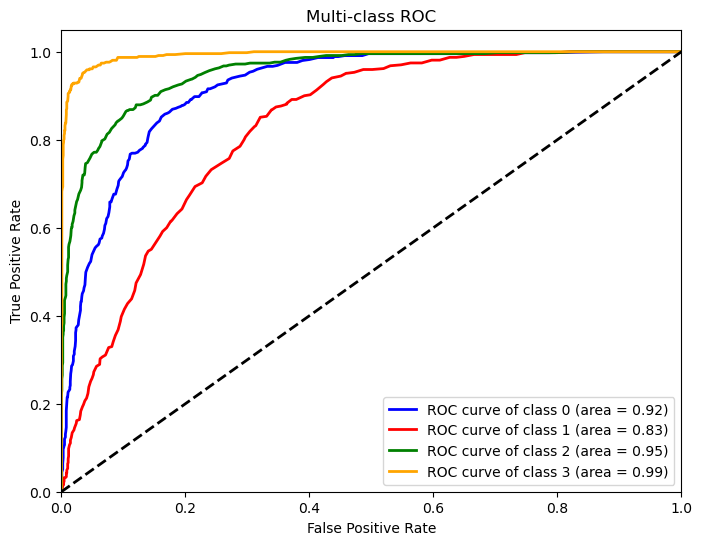

In [19]:

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
y_score = rf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

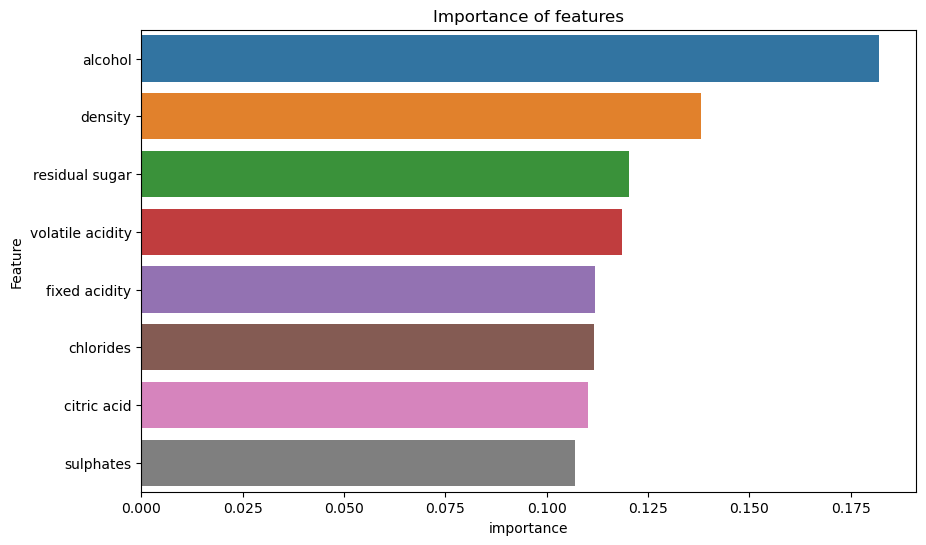

In [20]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values(by='importance', ascending=False)
feature_import = rf.feature_importances_
feature_df = pd.DataFrame({'Feature':X.columns, 'importance':feature_import}).sort_values(by='importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='Feature', data=feature_df)
plt.title('Importance of features')
plt.show()